In [1]:
import pandas as pd
import numpy as np
wines1 = pd.read_csv('C:/Users/regi_/Downloads/winemag-data_first150k.csv')

In [2]:
#we had two dataframes in this project. I download them separately then concat them. The dfs differ by 3 columns. 
print(wines1.shape)
wines1.head(1)

(150930, 11)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


In [3]:
wines2 = pd.read_csv('C:/Users/regi_/Downloads/winemag-data-130k-v2.csv')

In [4]:
print(wines2.shape)
wines2.head(1)

(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [5]:
wines = pd.concat([wines1, wines2], axis = 0, sort=True)

# Objective #1: to recommend the tasters different wines. 

In [11]:
wines2[:3]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [12]:
wines2 = wines2.drop(["taster_twitter_handle", "Unnamed: 0"], axis=1) #dropping the obvious columns

In [13]:
wines2

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [14]:
wines2.isna().sum()

country           63
description        0
designation    37465
points             0
price           8996
province          63
region_1       21247
region_2       79460
taster_name    26244
title              0
variety            1
winery             0
dtype: int64

In [15]:
wines2 = wines2[pd.notnull(wines2['variety'])]

In [16]:
wines2.taster_name.unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

In [17]:
wines2['taster_name'] = wines2['taster_name'].replace('Anne Krebiehl\xa0MW', 'Anne Krebiehl')

c:\users\regi_\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
customer_products = wines2.groupby(['taster_name', 'variety']).agg({'points':'mean'}).reset_index()
customer_products[:10]

,taster_name,variety,points
0,Alexander Peartree,Aglianico,84.000000
1,Alexander Peartree,Albariño,86.000000
2,Alexander Peartree,Auxerrois,87.000000
3,Alexander Peartree,Barbera,85.000000
4,Alexander Peartree,Blanc du Bois,85.000000
5,Alexander Peartree,Bordeaux-style Red Blend,86.117647
6,Alexander Peartree,Cabernet Franc,86.418605
7,Alexander Peartree,Cabernet Franc-Merlot,89.000000
8,Alexander Peartree,Cabernet Merlot,85.000000
9,Alexander Peartree,Cabernet Sauvignon,86.625000


In [59]:
prod_cust_pivot = customer_products.pivot_table(values='points', 
                                                columns='taster_name', 
                                                index='variety', 
                                                aggfunc='mean').fillna(0)

prod_cust_pivot.head()

taster_name,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone
variety,,,,,,,,,,,,,,,,,,,
Abouriou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,89.0,0.0,0.000000,85.000000
Agiorgitiko,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,87.031746,0.000000
Aglianico,84.0,0.0,0.0,0.0,0.0,0.0,0.0,90.2,0.0,89.780899,0.0,91.666667,0.000000,0.0,0.0,0.0,0.0,0.000000,85.833333
Aidani,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,82.000000,0.000000
Airen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,81.666667,0.0,0.0,0.0,0.0,0.000000,0.000000


In [60]:
cust_prod_pivot = prod_cust_pivot.T
cust_prod_pivot.head()

variety,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Aleatico,Alfrocheiro,...,Yapincak,Zelen,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
taster_name,,,,,,,,,,,,,,,,,,,,,
Alexander Peartree,0.0,0.0,84.0,0.0,0.0,0.0,0.0,86.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Anna Lee C. Iijima,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,...,0.0,88.0,0.0,0.000000,0.0,0.0,0.0,88.000000,0.0,0.0
Anne Krebiehl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,90.083333,90.4,0.0,0.0,88.830769,0.0,0.0
Carrie Dykes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
Christina Pickard,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [61]:
#normalize the data
prod_cust_pivot = prod_cust_pivot.div(prod_cust_pivot.sum(axis=1), axis=0)
cust_prod_pivot = cust_prod_pivot.div(cust_prod_pivot.sum(axis=1), axis=0)

# user similarity based recommendations

In [62]:
from scipy.spatial.distance import pdist, squareform
cust_dist = pd.DataFrame(1/(1 + squareform(pdist(cust_prod_pivot, 'euclidean'))),
                         index=cust_prod_pivot.index, columns=cust_prod_pivot.index)
cust_dist.head()

taster_name,Alexander Peartree,Anna Lee C. Iijima,Anne Krebiehl,Carrie Dykes,Christina Pickard,Fiona Adams,Jeff Jenssen,Jim Gordon,Joe Czerwinski,Kerin O’Keefe,Lauren Buzzeo,Matt Kettmann,Michael Schachner,Mike DeSimone,Paul Gregutt,Roger Voss,Sean P. Sullivan,Susan Kostrzewa,Virginie Boone
taster_name,,,,,,,,,,,,,,,,,,,
Alexander Peartree,1.000000,0.890943,0.865476,0.867504,0.713158,0.772337,0.875362,0.902103,0.891756,0.884441,0.887003,0.897494,0.890325,0.874911,0.901835,0.889255,0.900541,0.882503,0.901745
Anna Lee C. Iijima,0.890943,1.000000,0.883113,0.857795,0.713589,0.766349,0.903954,0.902441,0.907560,0.899714,0.893169,0.903955,0.909709,0.888274,0.911533,0.913268,0.906806,0.897588,0.907057
Anne Krebiehl,0.865476,0.883113,1.000000,0.837081,0.718093,0.767131,0.875460,0.871109,0.874328,0.870925,0.866123,0.872643,0.873505,0.860994,0.877420,0.886520,0.873941,0.870790,0.873263
Carrie Dykes,0.867504,0.857795,0.837081,1.000000,0.703021,0.772012,0.846884,0.854900,0.849323,0.845461,0.843870,0.851676,0.850650,0.845038,0.855752,0.850520,0.856678,0.851408,0.854876
Christina Pickard,0.713158,0.713589,0.718093,0.703021,1.000000,0.690460,0.715116,0.716128,0.713731,0.709867,0.714900,0.711671,0.711941,0.716171,0.714797,0.712901,0.714093,0.714940,0.715304


In [63]:
recommendations = {}
customers = list(customer_products['taster_name'].unique())

for customer in customers:
    similar_cust = list(cust_dist[customer].sort_values(ascending=False)[1:].head().index)
    sim_cust_prod = customer_products[customer_products['taster_name'].isin(similar_cust)]
    grouped = sim_cust_prod.groupby('variety').agg({'points':'mean'})
    ranked_products = grouped.sort_values('points', ascending=False).reset_index()
    
    merged = pd.merge(ranked_products, pd.DataFrame(cust_prod_pivot.T[customer]), on='variety')
    merged.columns = ['variety', 'points', 'Purchased']
    recs = merged[merged['Purchased']==0].head()
    recommendations[customer] = list(recs['variety'])

user_recs = pd.DataFrame.from_dict(recommendations, orient='index').reset_index()
user_recs.columns = ['taster_name', 'Rec1', 'Rec2', 'Rec3', 'Rec4', 'Rec5']
user_recs

,taster_name,Rec1,Rec2,Rec3,Rec4,Rec5
0,Alexander Peartree,Syrah-Petit Verdot,Moscato Giallo,Tannat-Syrah,Touriga Nacional Blend,Trousseau Gris
1,Anna Lee C. Iijima,Cabernet-Shiraz,Terrantez,Tinta del Pais,Bual,Chardonnay Weissburgunder
2,Anne Krebiehl,Cabernet-Shiraz,Terrantez,Bual,Riesling-Chardonnay,Chardonnay Weissburgunder
3,Carrie Dykes,Riesling-Chardonnay,Touriga Nacional Blend,Malbec-Cabernet Sauvignon,Cabernet Sauvignon-Sangiovese,Grenache-Syrah
4,Christina Pickard,Gelber Traminer,Champagne Blend,Moscato Giallo,Trousseau Gris,Tempranillo-Cabernet Sauvignon
5,Fiona Adams,Syrah-Petit Verdot,Mourvèdre-Syrah,Moscato Giallo,Tempranillo-Cabernet Sauvignon,Tannat-Syrah
6,Jeff Jenssen,Terrantez,Tinta del Pais,Bual,Sercial,Riesling-Chardonnay
7,Jim Gordon,Tinta del Pais,Moscato Giallo,Garnacha-Cariñena,Trousseau Gris,Syrah-Petit Verdot
8,Joe Czerwinski,Tinta del Pais,Terrantez,Bual,Chardonnay Weissburgunder,Moscato Giallo
9,Kerin O’Keefe,Tinta del Pais,Terrantez,Bual,Chardonnay Weissburgunder,Sercial


# Item Similarity based Recommendations

In [64]:
prod_dist = pd.DataFrame(1/(1 + squareform(pdist(prod_cust_pivot, 'euclidean'))),
                         index=prod_cust_pivot.index, columns=prod_cust_pivot.index)
prod_dist

variety,Abouriou,Agiorgitiko,Aglianico,Aidani,Airen,Albana,Albanello,Albariño,Aleatico,Alfrocheiro,...,Yapincak,Zelen,Zibibbo,Zierfandler,Zierfandler-Rotgipfler,Zinfandel,Zlahtina,Zweigelt,Çalkarası,Žilavka
variety,,,,,,,,,,,,,,,,,,,,,
Abouriou,1.000000,0.449468,0.583257,0.449468,0.449468,0.449468,0.449468,0.585799,0.449468,0.591418,...,0.449468,0.449468,0.449468,0.588832,0.449468,0.584705,0.499933,0.586168,0.449468,0.449468
Agiorgitiko,0.449468,1.000000,0.477203,1.000000,0.414214,0.414214,0.414214,0.486828,0.414214,0.414214,...,0.414214,0.414214,0.414214,0.449490,0.414214,0.480740,0.580197,0.480737,0.414214,0.414214
Aglianico,0.583257,0.477203,1.000000,0.477203,0.477203,0.528882,0.528882,0.732810,0.528882,0.477203,...,0.477203,0.477203,0.528882,0.544428,0.477203,0.711758,0.544381,0.622769,0.477203,0.477203
Aidani,0.449468,1.000000,0.477203,1.000000,0.414214,0.414214,0.414214,0.486828,0.414214,0.414214,...,0.414214,0.414214,0.414214,0.449490,0.414214,0.480740,0.580197,0.480737,0.414214,0.414214
Airen,0.449468,0.414214,0.477203,0.414214,1.000000,0.414214,0.414214,0.514779,0.414214,0.414214,...,0.414214,0.414214,0.414214,0.449490,0.414214,0.480740,0.449467,0.480737,0.414214,0.414214
Albana,0.449468,0.414214,0.528882,0.414214,0.414214,1.000000,1.000000,0.486828,1.000000,0.414214,...,0.414214,0.414214,1.000000,0.449490,0.414214,0.480740,0.449467,0.480737,0.414214,0.414214
Albanello,0.449468,0.414214,0.528882,0.414214,0.414214,1.000000,1.000000,0.486828,1.000000,0.414214,...,0.414214,0.414214,1.000000,0.449490,0.414214,0.480740,0.449467,0.480737,0.414214,0.414214
Albariño,0.585799,0.486828,0.732810,0.486828,0.514779,0.486828,0.486828,1.000000,0.486828,0.486828,...,0.486828,0.513891,0.486828,0.561241,0.486828,0.769109,0.561188,0.709603,0.486828,0.486828
Aleatico,0.449468,0.414214,0.528882,0.414214,0.414214,1.000000,1.000000,0.486828,1.000000,0.414214,...,0.414214,0.414214,1.000000,0.449490,0.414214,0.480740,0.449467,0.480737,0.414214,0.414214


In [66]:
ID = 'Paul Gregutt' #taking a taster of your choice
cust_purchases = pd.DataFrame(cust_prod_pivot.loc[ID]).reset_index().rename(columns={ID:'points'})
cust_purchases = cust_purchases[cust_purchases["points"]!=0].reset_index()
cust_purchases.head()

,index,variety,points
0,7,Albariño,0.007855
1,12,Aligoté,0.007639
2,24,Arneis,0.007814
3,31,Auxerrois,0.007877
4,37,Baco Noir,0.007601


In [67]:
def similar_products(x):
    similarities = prod_dist[x].sort_values(ascending=False)[1:6]
    return list(similarities.index)

In [68]:
result = {}
for item in cust_purchases['variety']:
    result[item] = similar_products(item)

In [69]:
products_lst = list(result.values()) #nested list
products_lst[:2]

[['Carmenère', 'Meritage', 'Barbera', 'Tannat', 'Petit Verdot'],
 ['Counoise',
  'Blaufränkisch',
  'Bordeaux-style White Blend',
  'Semillon-Sauvignon Blanc',
  'Syrah-Petite Sirah']]

In [70]:
flat_list =  [item for sublist in products_lst for item in sublist] #flattened list
flat_list =  [i for i in flat_list if i not in list(result.keys())] #filtered list

In [71]:
counts = pd.Series(flat_list).value_counts()
list(counts[:5].index)

['Fiano',
 'Sauvignon Blanc-Chenin Blanc',
 'St. Laurent',
 'Carignane',
 'Charbono']

In [72]:
recommendations = {}
customers = list(customer_products['taster_name'].unique())
customers.sort()

In [73]:
def recommended_list(ID):
    cust_purchases = pd.DataFrame(cust_prod_pivot.loc[ID]).reset_index().rename(columns={ID:'points'})
    cust_purchases = cust_purchases[cust_purchases["points"]!=0].reset_index()
    def similar_products(x):
        similarities = prod_dist[x].sort_values(ascending=False)[1:6]
        return list(similarities.index)
    result = {}
    for item in cust_purchases['variety']:
        result[item] = similar_products(item)
        products_lst = list(result.values())
    flat_list =  [item for sublist in products_lst for item in sublist]
    flat_list =  [i for i in flat_list if i not in list(result.keys())]
    counts = pd.Series(flat_list).value_counts()
    return list(counts[:5].index)  

In [74]:
for ID in customers:
    recommendations.update({ID:recommended_list(ID)})

In [75]:
recommendations
list(recommendations.items())[:3] 

[('Alexander Peartree',
  ['Chenin Blanc',
   'Sémillon',
   'Rhône-style White Blend',
   'Grenache',
   'Teroldego']),
 ('Anna Lee C. Iijima',
  ['Mourvèdre', 'Tannat', 'Aglianico', 'Zlahtina', 'Rhône-style White Blend']),
 ('Anne Krebiehl',
  ['Malvasia',
   'Merlot-Cabernet Franc',
   'Viognier-Roussanne',
   'Pinot Grigio',
   'Kekfrankos'])]

In [76]:
df = pd.DataFrame(recommendations).T.rename(columns={0:'Recommend1',1:'Recommend2',2:'Recommend3', 3:'Recommend4',4:'Recommend5'})
df

,Recommend1,Recommend2,Recommend3,Recommend4,Recommend5
Alexander Peartree,Chenin Blanc,Sémillon,Rhône-style White Blend,Grenache,Teroldego
Anna Lee C. Iijima,Mourvèdre,Tannat,Aglianico,Zlahtina,Rhône-style White Blend
Anne Krebiehl,Malvasia,Merlot-Cabernet Franc,Viognier-Roussanne,Pinot Grigio,Kekfrankos
Carrie Dykes,Barbera,Sangiovese,Mourvèdre,Saperavi,Pinot Grigio
Christina Pickard,Red Blend,Syrah,Cabernet Sauvignon,Rosé,Muscat
Fiona Adams,Rosé,Sauvignon Blanc,Zinfandel,Semillon-Sauvignon Blanc,Viognier
Jeff Jenssen,Sémillon,Mourvèdre,Blaufränkisch,Rosato,Chenin Blanc
Jim Gordon,Shiraz-Mourvèdre,Cabernet Sauvignon-Merlot-Shiraz,Cabernet Sauvignon-Merlot,Tempranillo-Cabernet Sauvignon,Cabernet Sauvignon-Shiraz
Joe Czerwinski,Cinsault,Monastrell,Malvasia,Tannat,Chambourcin
Kerin O’Keefe,Merlot-Malbec,Muscadelle,Savagnin,Tannat,Mourvèdre


# Objective #2: predictions and model evaluation

In [179]:
wines1 = pd.read_csv('C:/Users/regi_/Downloads/winemag-data_first150k.csv')
wines2 = pd.read_csv('C:/Users/regi_/Downloads/winemag-data-130k-v2.csv')

In [180]:
wines = pd.concat([wines1, wines2], axis = 0, sort=True)

In [181]:
wines.shape

(280901, 14)

In [182]:
#all the variables are the type they're supposed to be
wines.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [183]:
wines.describe().T #just numerical columns

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,280901.0,70615.705960,41214.379445,0.0,35112.0,70225.0,105337.0,150929.0
points,280901.0,88.146934,3.151528,80.0,86.0,88.0,90.0,100.0
price,258210.0,34.177162,38.611708,4.0,16.0,25.0,40.0,3300.0


In [184]:
wines.describe(include='all').T #all columns. overview of data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,280901,NaN,NaN,NaN,70615.7,41214.4,0,35112,70225,105337,150929
country,280833,50,US,116901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,280901,169430,A little bit funky and unsettled when you pop ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,197701,47239,Reserve,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,280901,NaN,NaN,NaN,88.1469,3.15153,80,86,88,90,100
price,258210,NaN,NaN,NaN,34.1772,38.6117,4,16,25,40,3300
province,280833,490,California,80755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,234594,1332,Napa Valley,10689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,111464,18,Central Coast,24122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
taster_name,103727,19,Roger Voss,25514,NaN,NaN,NaN,NaN,NaN,NaN,NaN


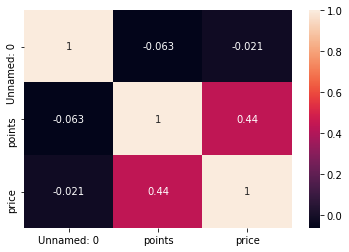

In [185]:
#checking for multicollinearity. in our case we have none. 
import seaborn as sns
%matplotlib inline
sns.heatmap(wines.corr(), annot=True)

In [186]:
wines.isna().sum()

Unnamed: 0                    0
country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
taster_name              177174
taster_twitter_handle    182143
title                    150930
variety                       1
winery                        0
dtype: int64

In [187]:
wines.isna().sum()*100/len(wines) #in percentage

Unnamed: 0                0.000000
country                   0.024208
description               0.000000
designation              29.618976
points                    0.000000
price                     8.077935
province                  0.024208
region_1                 16.485167
region_2                 60.319116
taster_name              63.073467
taster_twitter_handle    64.842418
title                    53.730674
variety                   0.000356
winery                    0.000000
dtype: float64

In [188]:
#if a columns has a lot of missing data, that column is not reliable for predicting. therefore, should be dropped
wines = wines.drop(["taster_name", "title", "region_1", "region_2", "designation", "taster_twitter_handle", "description", "province", "winery", "Unnamed: 0"], axis=1)

In [189]:
wines[:3]

,country,points,price,variety
0,US,96,235.0,Cabernet Sauvignon
1,Spain,96,110.0,Tinta de Toro
2,US,96,90.0,Sauvignon Blanc


In [190]:
wines = wines[pd.notnull(wines['variety'])] #dropping the 1 nan in variety column

In [191]:
wines["country"].nunique() 
#that is a lot for ml, we are going to check the value counts and group the ones with small values and call them Other.

50

In [192]:
countries = wines.country.value_counts()[:25]
countries = list(countries.index)
print(countries)

['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina', 'Australia', 'Austria', 'New Zealand', 'Germany', 'South Africa', 'Greece', 'Israel', 'Canada', 'Hungary', 'Romania', 'Bulgaria', 'Uruguay', 'Slovenia', 'Croatia', 'Turkey', 'Mexico', 'Moldova', 'Georgia']


In [193]:
wines["country"] = np.where(wines["country"].isin(countries), wines["country"], "OTHER")

In [194]:
wines.variety.nunique() #that is too many for ml, we should group them together. 

756

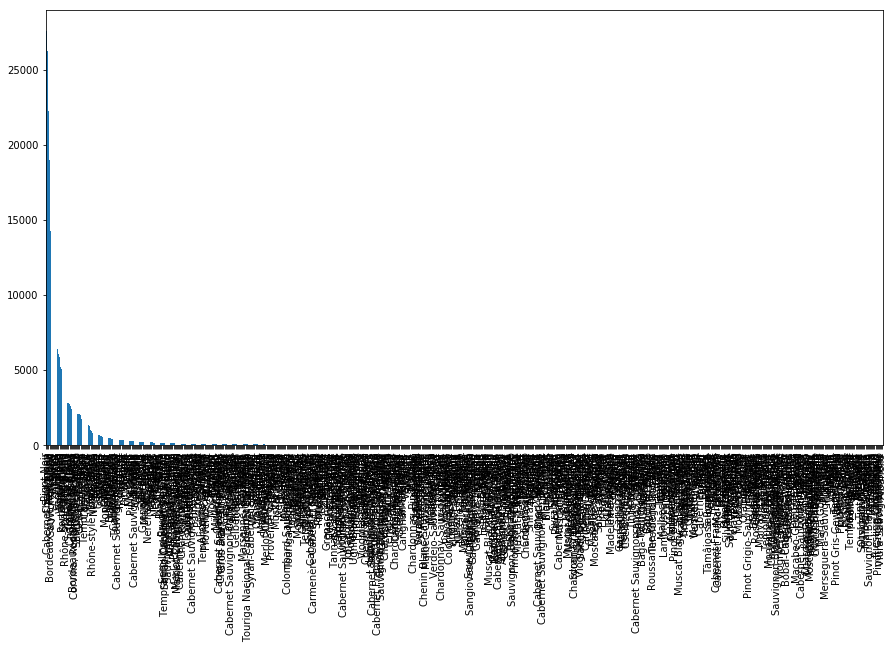

In [195]:
wines['variety'].value_counts().plot.bar(figsize=(15, 8)) #distribution of variety

In [196]:
#same as with country column. We can group into "other" the small values
varieties = wines['variety'].value_counts()[:39]
varieties = list(varieties.index)
print(varieties)

['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend', 'Sauvignon Blanc', 'Riesling', 'Syrah', 'Merlot', 'Zinfandel', 'Rosé', 'Sangiovese', 'Malbec', 'White Blend', 'Nebbiolo', 'Portuguese Red', 'Tempranillo', 'Sparkling Blend', 'Rhône-style Red Blend', 'Pinot Gris', 'Shiraz', 'Cabernet Franc', 'Champagne Blend', 'Grüner Veltliner', 'Pinot Grigio', 'Bordeaux-style White Blend', 'Corvina, Rondinella, Molinara', 'Viognier', 'Portuguese White', 'Sangiovese Grosso', 'Barbera', 'Gewürztraminer', 'Port', 'Petite Sirah', 'Gamay', 'Tempranillo Blend', 'Chenin Blanc', 'Carmenère', 'Glera']


In [197]:
wines["variety"] = np.where(wines["variety"].isin(varieties), wines["variety"], "OTHER")

In [198]:
#now create a dummy table for country and variety columns
wine_dummy = pd.get_dummies(wines, columns=(["country", "variety"]), drop_first=True)
wine_dummy.head()

,points,price,country_Australia,country_Austria,country_Bulgaria,country_Canada,country_Chile,country_Croatia,country_France,country_Georgia,...,variety_Sangiovese Grosso,variety_Sauvignon Blanc,variety_Shiraz,variety_Sparkling Blend,variety_Syrah,variety_Tempranillo,variety_Tempranillo Blend,variety_Viognier,variety_White Blend,variety_Zinfandel
0,96,235.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,96,110.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,96,90.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,96,65.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,95,66.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [200]:
k = np.array(wine_dummy['points']).reshape(-1, 1)

In [201]:
#normalizing the numerical column
wine_dummy['points'] = MinMaxScaler().fit_transform(k)
wine_dummy[:5]

,points,price,country_Australia,country_Austria,country_Bulgaria,country_Canada,country_Chile,country_Croatia,country_France,country_Georgia,...,variety_Sangiovese Grosso,variety_Sauvignon Blanc,variety_Shiraz,variety_Sparkling Blend,variety_Syrah,variety_Tempranillo,variety_Tempranillo Blend,variety_Viognier,variety_White Blend,variety_Zinfandel
0,0.80,235.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.80,110.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.80,90.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.80,65.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.75,66.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
wine_dummy = wine_dummy.dropna()

In [204]:
y = wine_dummy["price"] # for splitting the data in the next step
wine_dummy = wine_dummy.drop("price", axis=1)

# Modeling, predicting

In [206]:
from sklearn.model_selection import train_test_split
X = wine_dummy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [207]:
from sklearn.linear_model import LinearRegression

In [211]:
wines_model = LinearRegression().fit(X_train, y_train)

In [212]:
y_pred_test = wines_model.predict(X_test)

In [213]:
pd.DataFrame({'observed':y_test, 'predicted':y_pred_test}).head(10)

,observed,predicted
30640,7.0,0.948681
128753,15.0,37.571997
17206,16.0,5.398291
115563,13.0,23.692336
67020,100.0,57.923971
105719,50.0,74.279191
123097,10.0,20.518875
54859,260.0,72.987938
102008,28.0,28.192257
27544,20.0,36.213483


In [214]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R2:", r2_score(y_test, y_pred_test))

MSE: 950.9938440605611
RMSE: 30.838188080050376
R2: 0.2639614811789792


In [215]:
#training data

In [216]:
y_pred_train = wines_model.predict(X_train)

In [217]:
pd.DataFrame({'observed':y_train, 'predicted':y_pred_train}).head(10)

,observed,predicted
40873,160.0,68.389655
55491,96.0,55.839339
91735,28.0,29.666738
116460,15.0,14.277357
122621,10.0,8.933455
125975,98.0,53.417745
64798,34.0,50.914102
42587,10.0,14.633310
80290,3300.0,48.129809
96367,18.0,34.559286


In [218]:
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R2:", r2_score(y_train, y_pred_train))

MSE: 1182.679908502359
RMSE: 34.39011352848895
R2: 0.23230899511435366


In [220]:
#this model doesn't work well for our dataset and ml, since most of the features are categorical

# Knn

In [221]:
from sklearn.neighbors import KNeighborsClassifier

In [222]:
wines_knn3 = KNeighborsClassifier(n_neighbors=3).fit(X_test, y_test)

In [223]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [224]:
y_pred = wines_knn3.predict(X_test) #with k=3
confusion_matrix(y_test, y_pred)

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  8,  0, ...,  0,  0,  0],
       [ 0,  0, 21, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [225]:
accuracy_score(y_test, y_pred)

0.10036404476976105

In [226]:
wine_knn10 = KNeighborsClassifier(n_neighbors=10).fit(X_test, y_test) #with k=10
y_pred = wine_knn10.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [227]:
accuracy_score(y_test, y_pred)

0.112485961039464

In [228]:
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R2:", r2_score(y_train, y_pred_train))

MSE: 1182.679908502359
RMSE: 34.39011352848895
R2: 0.23230899511435366


# Random Forest

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
ks_rf = RandomForestClassifier().fit(X_train, y_train)

c:\users\regi_\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [230]:
y_pred_test_rf = ks_rf.predict(X_test)
confusion_matrix(y_test, y_pred_test_rf)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [231]:
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R2:", r2_score(y_train, y_pred_train))

MSE: 1823.8834920224715
RMSE: 42.70694898985962
R2: -0.2477847470365353


In [232]:
#we cannont do random forest on the original dataset without dropping the columns because most of the columns are categorical. 

In [ ]:
#conclusion: this particular dataset is not great for machine learning, because it contains just a few features we could work with and they're mostly categorical 